In [2]:
import sys 
sys.path.append("..") 

#from topological_models import generator
import numpy as np
from topology_model import NonHermitianHamiltonian, NonHermitianTopologicalModel
import matplotlib.pyplot as plt
import matplotlib
from machine_learning import Cluster
from machine_learning import Classifier
from topology_model import sigma_0, sigma_x, sigma_y, sigma_z
from topology_model import Generator
from topology_model import topology_comparator

from tools import save_data, save_data_M

In [3]:
class HatanoNelson1D(NonHermitianHamiltonian):
    def __init__(self, E_ref=0.):
        super().__init__(E_ref)
        self.Js = None
        self.initiate()

    def get_n(self):
        return 1

    def get_n_dim(self):
        return 1

    def get_parameters(self):
        return self.Js
    
    def set_parameters(self, **kwargs):
        self.Js = kwargs['J1'], kwargs['J2']

    def initiate(self):
        # J1 = np.random.random()
        # J2 = np.random.random()
        J1 = 1.
        J2 = 2*np.random.random()
        self.Js = J1, J2

    def get_kpoints(self):
        n_points = 11
        kpoints = [[k] for k in np.linspace(0,np.pi,n_points)]
        return kpoints
    
    def get_Hamiltonian(self, k):
        k = k[0]
        J1, J2 = self.Js
        hk = np.zeros(1, dtype=complex)
        hk = hk + J1*np.exp(-1j*k) + J2*np.exp(1j*k)
        
        return hk

    def get_topological_invariant(self):
        J1, J2 = self.Js
        if J1 > J2:
            return -1
        elif J1 < J2:
            return 1
        else:
            return 0

In [4]:
gap_type = 'point'
E_ref = 0.
generator = Generator(hamiltonian=HatanoNelson1D(E_ref=E_ref), gap_type=gap_type)

n_sample = 100
#models, vs = generator.generate_models(n_sample)
models, vs = generator.generate_models(n_sample)
n = generator.get_n()

In [5]:
print("Theoretically, Possible topological invariants: {0}".format(np.unique(vs)))
uni_v = np.unique(vs)
for v in uni_v:
    print("Theoretically, The number with {0} : {1}".format(v, np.sum(vs==v)))

def sfunc(Q1, Q2):
    nQ = len(Q1)
    for n in range(nQ):
        _Q = Q1[n]+Q2[n]
        for v in np.linalg.eigvalsh(_Q):
            if np.log10(np.abs(v)) < -10:
                return 0
    return 1

sfunc = topology_comparator

cluster = Cluster(similarity_function=sfunc, verbose=False)
center_indices, group_number = cluster.fit(models)
print("The number of centers: ", len(center_indices))

Theoretically, Possible topological invariants: [-1.  1.]
Theoretically, The number with -1.0 : 49
Theoretically, The number with 1.0 : 51
The number of centers:  2


In [6]:
group_number

array([51, 49])

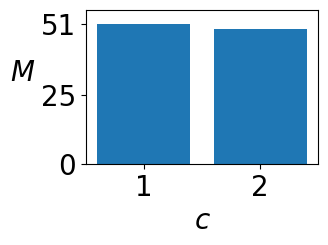

In [7]:
plt.figure(figsize=(3,2))
plt.bar(np.arange(len(group_number))+1, group_number)
plt.xlim([0.5,len(group_number)+0.5])
plt.xticks(list(range(1,len(group_number)+1)),fontsize=20)
plt.ylim([0, np.max(group_number)*1.1])
plt.yticks([0, int(np.max(group_number)/2), int(np.max(group_number))],fontsize=20)
plt.xlabel(r"$c$",fontsize=20)
plt.ylabel(r"$M$",fontsize=20,rotation=0,horizontalalignment='right')
plt.show()

In [54]:
# classifier = Classifier(similarity_func=topology_comparator, cluster_centers=[models[index] for index in center_indices])
# n1 = 21
# n2 = 21
# J1s = np.linspace(0.001,1,n1)
# J2s = np.linspace(0.001,1,n2)
# v_list = np.zeros((n1,n2))

# for i in range(n1):
#     for j in range(n2):
#         hamiltonian = HatanoNelson1D(E_ref=0.)
#         hamiltonian.set_parameters(J1=J1s[i], J2=J2s[j])
#         #print(hamiltonian.get_parameters())
#         _model = NonHermitianTopologicalModel(hamiltonian=hamiltonian, gap_type=gap_type)
#             #v_list.append(1)
#             # t1_list.append(t1s[i])
#             # gamma_list.append(gammas[j])
#         v_list[i,j] = classifier.classify(_model)

/home/longyang/OSC/ml_topological_classification_non_-hermitian/cases/../topology_model/topology_comparator_utils.py:26: RuntimeWarning: divide by zero encountered in log10
  return np.log10(a0)/epsilon
/home/longyang/anaconda3/lib/python3.9/site-packages/scipy/optimize/_optimize.py:917: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/home/longyang/OSC/ml_topological_classification_non_-hermitian/cases/../topology_model/topology_comparator_utils.py:34: RuntimeWarning: divide by zero encountered in log10
  if np.log10(np.abs(v)) < c_val:


In [28]:
np.unique(v_list)
np.where(v_list==-1)

(array([0]), array([0]))

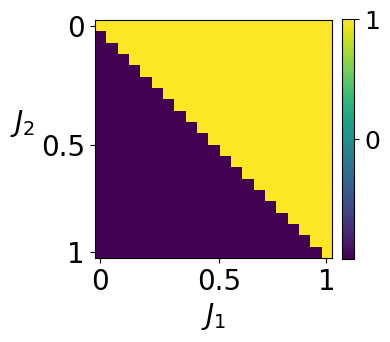

In [55]:
# plt.figure(figsize=(4,4))
# plt.imshow(v_list)    
# plt.xlabel(r"$J_1$",fontsize=20)
# plt.ylabel(r"$J_2$",fontsize=20,rotation=0,horizontalalignment='right')
# plt.xticks([0, n1/2, n1-1],[r"0", "0.5", r"1"],fontsize=20)
# plt.yticks([0, n2/2, n2-1],[r"0", "0.5", r"1"], fontsize=20)

# # cmap = plt.cm.rainbow
# # norm = matplotlib.colors.BoundaryNorm(np.arange(-2.5, 3, 1), cmap.N)
# cb = plt.colorbar(ticks=range(len(center_indices)+1), fraction=0.046, pad=0.04)
# cb.ax.tick_params(labelsize=18)
# plt.tight_layout()
# plt.show()

In [13]:
classifier = Classifier(similarity_func=topology_comparator, cluster_centers=[models[index] for index in center_indices])
n1 = 51
J1 = 1.0
J2s = np.linspace(0.001,2,n1)
v_list = np.zeros(n1)

for i in range(n1):
    hamiltonian = HatanoNelson1D(E_ref=E_ref)
    hamiltonian.set_parameters(J1=J1, J2=J2s[i])
    _model = NonHermitianTopologicalModel(hamiltonian=hamiltonian, gap_type=gap_type)
    v_list[i] = classifier.classify(_model)

In [1]:
plt.figure(figsize=(4,4))
plt.plot(J2s, v_list,'-o')
plt.xticks([0, 1, 2],fontsize=20)
plt.yticks(range(1, len(group_number)+1),fontsize=20)
plt.xlim([-0.05, 2.05])
plt.ylim([1-0.05,len(group_number)+.05])
plt.xlabel(r"$J_2/J_1$",fontsize=20)
plt.ylabel(r"c",fontsize=20,rotation=0,horizontalalignment='right')

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

# Save data

In [17]:
name = "1D_Hatano_Nelson"
save_data(center_indices, group_number, "fig2_{0}_group_number.h5".format(name))
save_data_M(v_list, "fig2_{0}_phase_diagram.h5".format(name))
print(name)

1D_Hatano_Nelson


# Fast

In [6]:
gap_type = 'point'
generator = Generator(hamiltonian=HatanoNelson1D(E_ref=0.), gap_type=gap_type)

n_sample = 100
#models, vs = generator.generate_models(n_sample)
Qs, vs = generator.generate(n_sample)
n = generator.get_n()

In [7]:
print("Theoretically, Possible topological invariants: {0}".format(np.unique(vs)))
uni_v = np.unique(vs)
for v in uni_v:
    print("Theoretically, The number with {0} : {1}".format(v, np.sum(vs==v)))

def sfunc(Q1, Q2):
    nQ = len(Q1)
    for n in range(nQ):
        _Q = Q1[n]+Q2[n]
        for v in np.linalg.eigvalsh(_Q):
            if np.log10(np.abs(v)) < -10:
                return 0
    return 1

#sfunc = topology_comparator

cluster = Cluster(similarity_function=sfunc, verbose=False)
center_indices, group_number = cluster.fit(Qs)
print("The number of centers: ", len(center_indices))

Theoretically, Possible topological invariants: [-1.  1.]
Theoretically, The number with -1.0 : 49
Theoretically, The number with 1.0 : 51
The number of centers:  2


In [8]:
group_number

array([51, 49])